# Project of Chinahadoop.cn
## Machine Learning
## Prediction of the loss of IBM employees

This project uses the data of IBM's employee loss as a processing target to see if we can build some models to predict employee loss.

## The structure of the project
- Exploration of Data Science
- Feature Engineering
- Realize Machine Learning Models

----
## Data Exploration


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler ,LabelEncoder 
import warnings
warnings.filterwarnings('ignore')

# Read file
attrition = pd.read_csv('./data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 观察
从员工流失数据样本中，我们可以看到数据的一些特征：
    * Age
    * Attrition：员工是否已经离职，1表示已经离职，2表示未离职，这是目标预测值；
    * BusinessTravel：商务差旅频率，Non-Travel表示不出差，Travel_Rarely表示不经常出差，Travel_Frequently表示经常出差；
    * Department：员工所在部门，Sales表示销售部，Research & Development表示研发部，Human Resources表示人力资源部；
    * DistanceFromHome：公司跟家庭住址的距离，从1到29，1表示最近，29表示最远；
    * Education：员工的教育程度，从1到5，5表示教育程度最高；
    * EducationField：员工所学习的专业领域，Life Sciences表示生命科学，Medical表示医疗，Marketing表示市场营销，Technical Degree表示技术学位，Human Resources表示人力资源，Other表示其他；
    * EmployeeNumbe；
    * EnvironmentSatisfaction
    * Gender
    * JobInvolvement：员工工作投入度，从1到4，1为投入度最低，4为投入度最高；
    * JobLevel：职业级别，从1到5，1为最低级别，5为最高级别；
    * JobRole：工作角色：Sales Executive是销售主管，Research Scientist是科学研究员，Laboratory Technician实验室技术员，Manufacturing Director是制造总监，Healthcare Representative是医疗代表，Manager是经理，Sales Representative是销售代表，Research Director是研究总监，Human Resources是人力资源；
    * JobSatisfaction：工作满意度，从1到4，1代表满意程度最低，4代表满意程度最高；
    * MaritalStatus：员工婚姻状况，Single代表单身，Married代表已婚，Divorced代表离婚；
    * MonthlyIncome：员工月收入，范围在1009到19999之间；
    * NumCompaniesWorked：员工曾经工作过的公司数；
    * Over18：年龄是否超过18岁；
    * OverTime：是否加班，Yes表示加班，No表示不加班；
    * PercentSalaryHike：工资提高的百分比；
    * PerformanceRating：绩效评估；
    * RelationshipSatisfaction：关系满意度，从1到4，1表示满意度最低，4表示满意度最高；
    * StandardHours：标准工时；
    * StockOptionLevel：股票期权水平；
    * TotalWorkingYears：总工龄；
    * TrainingTimesLastYear：上一年的培训时长，从0到6，0表示没有培训，6表示培训时间最长；
    * WorkLifeBalance：工作与生活平衡程度，从1到4，1表示平衡程度最低，4表示平衡程度最高；
    * YearsAtCompany：在目前公司工作年数；
    * YearsInCurrentRole：在目前工作职责的工作年数
    * YearsSinceLastPromotion：距离上次升职时长
    * YearsWithCurrManager：跟目前的管理者共事年数；

在我们即将构建的机器学习模型当中，'Attrition'将是模型训练的目标列。

此外，我们看到我们混合了数字和分类数据类型。 对于分类数据类型（非数字列），我们将在以后的练习中再尝试新的处理方法。 本节将专注于数字类型的相关属性探索。

作为第一步，让我们快速进行一些简单的数据完整性检查，以查看数据中是否存在空值或无效值。

In [2]:
pd.isnull(attrition).sum()
# 查看表中是否有空值


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### 问题
数据集中有空值嘛？如果有，应该如何处理呢？

** 回答：** 没有空值；如果有，使用代码 attrition = attrition.dropna()

## Distribution of Datasetsh

通常，探索数据的前几个步骤之一就是大致了解这些特征如何分布。

直觉的判断，年龄(Age)、日工作效率（DailyRate）、员工满意度（JobSatisfaction）、月收入（MonthlyIncome）、工作表现（PerformanceRating）、工作生活平衡性（WorkLifeBalance）、进入公司年限（YearsAtCompany）这些属性与我们所关注的员工是否离职应有莫大的关系。

为此，我将从Seaborn绘图库调用** pairplot **函数，将这些属性之间的关系用可视化的方式表示出来：（如果您没有安装seaborn，可以调用conda install seaborn进行安装）。

### 挑战小提示
以下**TODO** 所需补充的代码逻辑，使用lambda和apply函数来完成可以让代码更为简洁和高效。

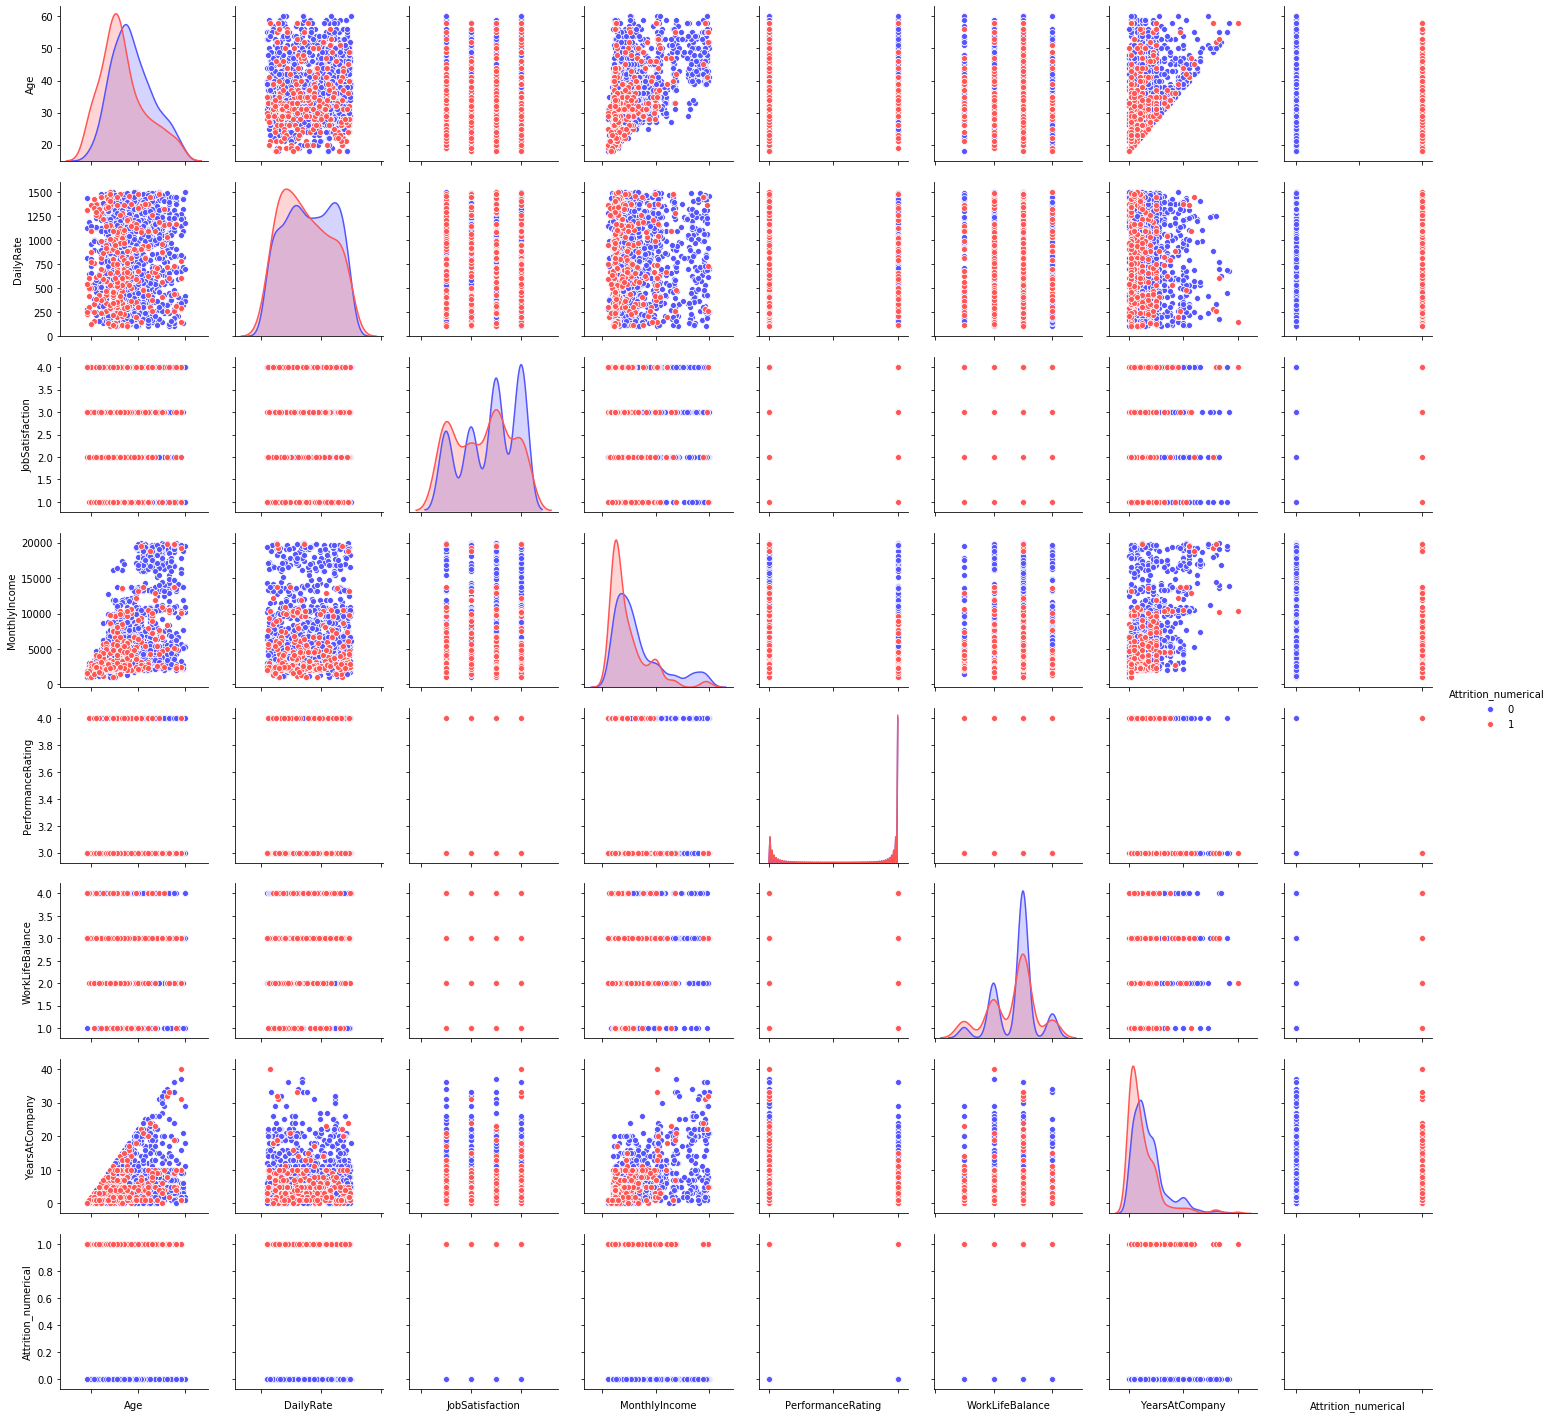

In [3]:
import seaborn as sns
# 将dataframe类型变量attrition中的Attrition列转化为Int类型，并放入一个新建的属性Attrition_numerical中。
# Attrition列中的元素与Attrition_numerical元素的值对应关系是：'Yes'=>1，'No'=>0
def int_transfer(x):
    if x == 'Yes':
        x = 1
        return x
    
    if x == 'No':
        x = 0
        return x
        
attrition['Attrition_numerical']= attrition['Attrition'].apply(int_transfer)


# 定义要绘制两两关系的属性列
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition_numerical']

# 绘制关系图
g = sns.pairplot(attrition[numerical], hue='Attrition_numerical', palette='seismic', diag_kind = 'kde',diag_kws=dict(shade=True))
g.set(xticklabels=[])


---
### 观察
在上图中，红色的点代表离职，蓝色代表未离职。

我们可以看到一些有意思的结果，比如在MonthlyIncome与YearsAtCompany交汇的这张图中，红色点更趋向集中于左下角，这很明显地说明了MonthlyIncome与YearsAtCompany都相对较低时，员工容易出现离职的情况。

再比如在YearsAtCompany这行对应的DailyRate这张图中，DailyRate的变化似乎对员工是否离职没有太多的影响。红色点集中于图像下部，YearsAtCompany小的员工相对更容易出现离职情况而与DailyRate没什么关系。

### 探索
这些关系具体如何更好的量化呢？让我们一起来探索一下吧！
- 首先我们要将员工的流失情况记录下来，并将其从原表中删除

In [4]:
# TODO
# 使用变量y记录attrition中'Attrition_numerical'这一列的值
y = []
for x in attrition['Attrition_numerical']:
    y.append(x)
# y = None

# TODO
# 将attrition中的'Attrition'以及'Attrition_numerical'列删除
del attrition['Attrition']
del attrition['Attrition_numerical']

attrition.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


### 属性类型判别
在数据当中有很多列的都是由字符串组成的，在对数据集进行了简要的探索之后，现在让我们继续进行特征工程的任务，并对我们的数据集中的某些非数值属性进行数字编码。  

首先，我们将通过使用dtype方法将数值列与非数值列分开，如下所示：

In [5]:
# categoricals列表将用于记录所有的非数值属性名
categoricals = []

for x in attrition[:0]:
    if attrition[x].dtypes == object:
        categoricals.append(x)
categoricals 
        # TODO
# 将非数值列的列名添加到列表categoricals中，并且将这些非数值列的列名都打印出来   

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

### 问题
为什么要将非数值属性进行数字编码？

** 回答： ** 为了计算处理的方便

### Feature Processing

In [6]:
# pandas get_dummies方法将非数值列转为数字，并用转化好的列替换掉原本的列

# 提取非数值类型
# TODO
# 将attrition中名字为categoricals中所记录的那些列数据提取出来，放到DataFrame类型的变量attrition_cat中
attrition_cat = pd.DataFrame(attrition,columns=categoricals)

# 使用pd.get_dummies将attrition_cat转换成数值形式并将结果覆盖赋值到原有变量attrition_cat之上
attrition_cat =pd.get_dummies(attrition_cat)

# 提取数值类型
numericals = []
for x in attrition[:0]:
    if attrition[x].dtypes != object:
        numericals.append(x)

# 获取attrition的数值类型属性列的所有数据，赋值到DataFrame类型的变量attrition_num上

attrition_num = pd.DataFrame(attrition,columns=numericals)


# 将attrition_num与attrition_cat进行拼接，生成新的DataFrame并赋值到变量attrition_final上
# attrition_final中的列由attrition_num与attrition_cat的列组成
# attrition_final

In [7]:
attrition_cat

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
1466,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
1467,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
1468,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,1,1,0


In [8]:
attrition_final = attrition_cat.join(attrition_num, on=None, how='left', lsuffix='', rsuffix='',sort=False)
attrition_final

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0,1,0,0,1,0,1,0,0,...,1,80,0,8,0,1,6,4,0,5
1,0,1,0,0,1,0,0,1,0,0,...,4,80,1,10,3,3,10,7,1,7
2,0,0,1,0,1,0,0,0,0,0,...,2,80,0,7,3,3,0,0,0,0
3,0,1,0,0,1,0,0,1,0,0,...,3,80,0,8,3,3,8,7,3,0
4,0,0,1,0,1,0,0,0,0,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,0,0,1,...,3,80,1,17,3,3,5,2,0,3
1466,0,0,1,0,1,0,0,0,0,1,...,1,80,1,9,5,3,7,7,1,7
1467,0,0,1,0,1,0,0,1,0,0,...,2,80,1,6,0,3,6,2,0,3
1468,0,1,0,0,0,1,0,0,0,1,...,4,80,0,17,3,2,9,6,0,8


### 思考题
- 我们可以看到，表格中数值分布较为分散，范围不一，比如DailyRate的值范围是一千多或者几百，HourlyRate的值大都为几时。这会对结果照成什么样的影响？如果我们将所有的数值全部限定在0-1范围内，会对结果又什么样的影响？

**提示：** 参考归一化内容。

** 回答：** 数据归一化后，最优解的寻优过程明显会变得平缓，更容易正确的收敛到最优解。

###  模型应用

We will use [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) to choose the following models to train the data: 
- GaussianNB
- DecisionTree
- K Nearest Neighbors
- SVM
- LogisticRegression

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
X = attrition_final

# Use train_test_split to divide train_set(80%) and test set(20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=0)

print('Samples in data is {}. Samples in Train_set is {}. Samples in test_set is{}'.format(len(X), len(X_train), len(X_test)))

NameError: name 'attrition_final' is not defined

### 问题
为什么需要将数据集划分为训练集和测试集?

** 回答： ** 为了在保证模型准确性的基础上，防止过度拟合，测试集可以很好的避免过度拟合。

### SVM
Set SVM model and calculate accuracy

### 决策树
请根据不同树深度建立决策树模型并计算准确率

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Depth of Tree
depths=[1,3,5,7,9]
# Accuracy
dt_acc=[]

def decision_acc(depth):
    dt_model = DecisionTreeClassifier(max_depth=depth)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

for x in depths:
    dt_acc.append(decision_acc(x))

print(dt_acc)

[0.8333333333333334, 0.8333333333333334, 0.8435374149659864, 0.8129251700680272, 0.7993197278911565]


### 朴素贝叶斯
请建立朴素贝叶斯模型并计算准确率

In [12]:
from sklearn.naive_bayes import GaussianNB

# 准确率
gnb_acc=[]

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# 构建GaussianNB模型（默认参数即可），并调用fit进行模型拟合


acc = gnb_model.score(X_test, y_test)
gnb_acc.append(acc)
# 计算GaussianNB在测试集上的准确率并将准确率结果添加到gnb_acc中


# 打印准确率
print('准确率：', gnb_acc[0])


准确率： 0.7755102040816326


### KNN
请建立KNN模型并计算准确率

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# K参数选项
neighbors = [1,3,5,7,9]
# 准确率
knn_acc=[]

def knn_acc_socore(neighbor):
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

for x in neighbors:
    knn_acc.append(knn_acc_socore(x))
knn_acc

# 尝试neighbors中所列举的所有K选项，使用KNeighborsClassifier模型做多次训练。
# 针对每种K值情况计算一次在测试集上的准确率，打印每次训练所获得的准确率，并将每次准确率结果添入列表knn_acc中。

[0.7585034013605442,
 0.7925170068027211,
 0.7993197278911565,
 0.8197278911564626,
 0.8231292517006803]

### 逻辑回归
请建立逻辑回归模型并计算准确率

In [15]:
from sklearn.linear_model import LogisticRegression

# 准确率
lr_acc=[]

# 构建LogisticRegression模型（默认参数即可），并调用fit进行模型拟合
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)



# 计算LogisticRegression在测试集上的准确率并将准确率结果添加到lr_acc中
acc = lr_model.score(X_test, y_test)
lr_acc.append(acc)




# 打印准确率
print('准确率：', lr_acc[0])

准确率： 0.8639455782312925


### 问题
为什么我们可以使用逻辑回归模型进行分类呢？

** 回答： **

## 模型比较

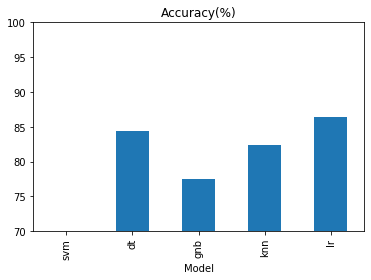

In [20]:
# 将结果以图像展示出来
results_df = pd.DataFrame(columns=['Accuracy (%)'],index=['svm','dt','gnb','knn','lr'])
results_df.index.name = 'Model'
# results_df.loc['svm', 'Accuracy (%)'] = max(svm_acc) * 100
results_df.loc['dt', 'Accuracy (%)'] = max(dt_acc) * 100
results_df.loc['gnb', 'Accuracy (%)'] = max(gnb_acc) * 100
results_df.loc['knn', 'Accuracy (%)'] = max(knn_acc) * 100
results_df.loc['lr', 'Accuracy (%)'] = max(lr_acc) * 100

plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
results_df.plot(y=['Accuracy (%)'], kind='bar', ylim=[70, 100], ax=ax1, title='Accuracy(%)', legend=False)


plt.tight_layout()
plt.show()

### 改进
相对于准确率，F1值对模型的评价更为准确，下面就请你们算出以上五个模型的F1值,并通过柱形图展示出来

In [27]:
# TODO
# 计算以上五个模型的F1值，保存在dataframe类型的变量results_df中并绘制成柱形图


### 问题

在这些模型中，你看到的SVM的F1值是多少？ 从F1值的角度评判该模型，所得到的好坏结论与从准确率角度评判所得结论是否相同？

您认为在这里例子中，使用F1值与准确率进行模型评判，哪个指标更为合理？为什么？

** 回答： **